<a href="https://colab.research.google.com/github/mainarel/Numerical_Methods_6/blob/main/1_Wave_equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

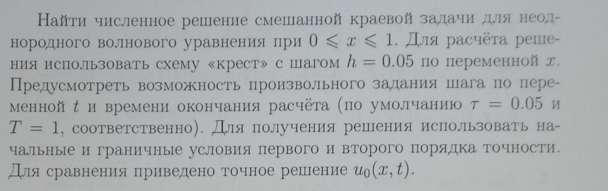

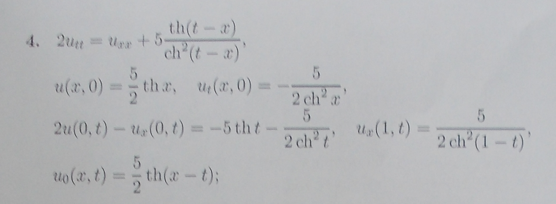




In [85]:
import numpy as np
from matplotlib import pyplot as plt


# u_tt = u_xx / 2 + 2.5 * th(t-x) / ch^2(t-x)

T_0 = 1
ro = 2

a0, b0, a1, b1 = 2, -1, 0, 1

def kurant(a, tau, h):
  return (a*a)*(tau**2)/(h**2)

def koef_a(T_0, ro):
  return T_0 / ro

def stability_condition(h, tau):
  if (koef_a(T_0, ro) * tau) / h <= 1:
    return True
  else:
    return False

def u0(x,t):
  return (5/2)*np.tanh(x-t)

def f(x,t):
  return 2.5 * np.tanh(t-x) / (np.cosh(t-x))**2

#начальные условия
def phi1(x):
  return 5/2 * np.tanh(x)

def phi2(x):
  return (-5 / 2) / (np.cosh(x))**2

#граничные условия
def gamma1(t):
  return -5 * np.tanh(t) - (5/2) / (np.cosh(t))**2

def gamma2(t):
  return (5/2) / (np.cosh(1-t))**2

xmin =  0
xmax = 1
h_cur = 0.05

tmin = 0
tmax = 1
tau_cur = 0.05

xk_cur = np.arange(xmin, xmax + h_cur, h_cur)
tn_cur = np.arange(tmin, tmax + tau_cur, tau_cur)
u1 = np.zeros((len(tn_cur),len(xk_cur)))
u2 = np.zeros((len(tn_cur),len(xk_cur)))

K = kurant(koef_a(T_0,ro), tau_cur, h_cur)

# Аппроксимация 1 порядка:

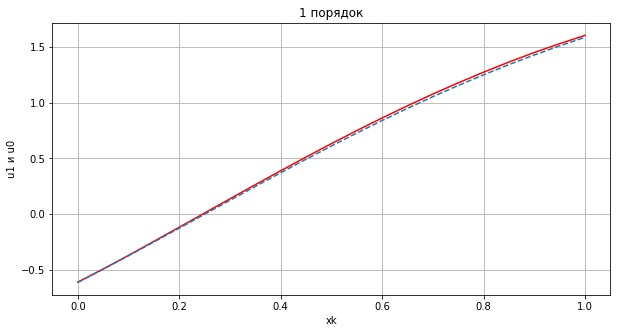

In [86]:
def ap1(h, tau, xk, tn):
  #аппроксимация начальных условий
  for k in range (0, len(xk)):
    u1[0][k] = phi1(xk[k])
    u1[1][k] = u1[0][k] + tau * phi2(xk[k])

    
  #аппроксимация граничных условий
  for n in range (1, len(tn) - 1):
    for k in range (1, len(xk)-1):
      u1[n+1][0] = ( u1[n+1][1] - h * gamma1(tn[n+1]) / b0 ) / (1 - h*a0/b0)
      u1[n+1][len(xk)-1] = ( u1[n+1][len(xk) - 1 - 1] + h * gamma2(tn[n+1]) / b1 ) / (1 + h * a1 / b1)
      
      u1[n+1][k] = K * (u1[n][k+1] - 2 * u1[n][k] + u1[n][k-1]) + 2 * u1[n][k] - u1[n-1][k] + f(xk[k], tn[n]) * (tau**2)

  return u1

yreal1 = [u0(x, tn_cur[5]) for x in xk_cur ]
ypol1 = [ap1(h_cur,tau_cur, xk_cur, tn_cur)[5][k] for k in range (0,len(xk_cur))]

plt.figure(figsize=(10,5))
plt.title("1 порядок")
plt.xlabel("xk")
plt.ylabel("u1 и u0")
plt.grid()
plt.plot(xk_cur, ypol1, color='red')
plt.plot(xk_cur, yreal1 , linestyle="--")

# Аппроксимация 2 порядка:

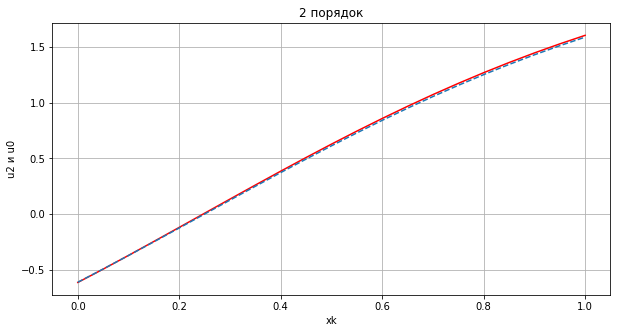

In [87]:
def d2phi1(x):
  return -5 * np.sinh(2*x) / (2*np.cosh(x))**4

def ap2(h,tau, xk, tn):
  #аппроксимация начальных условий
  for k in range (0, len(xk)):
    u2[0][k] = phi1(xk[k])
    u2[1][k] = u2[0][k] + tau * phi2(xk[k]) + tau**2 / 2 * (koef_a(T_0, ro)**2 * d2phi1(xk[k]) + f(xk[k], 0))

  #аппроксимация граничных условий
  for n in range (1, len(tn) - 1):
    for k in range (1, len(xk)-1):
      
      u2[n+1][0] = 2 * K * (u2[n][1] - (1 - h * a0 / b0) * u2[n][0] - h * gamma1(tn[n]) / b0) + 2 * u2[n][0] - u2[n-1][0] + tau**2 * f(0, tn[n])    
      u2[n+1][len(xk)-1] = 2 * K * (u2[n][len(xk) - 1 - 1] - (1 + h * a1 / b1) * u2[n][len(xk)-1] + h * gamma2(tn[n]) / b1) + 2 * u2[n][len(xk)-1] - u2[n-1][len(xk)-1] + tau**2 * f(xk[len(xk)-1], tn[n])

      u2[n+1][k] = 2 * u2[n][k] - u2[n-1][k] + K * (u2[n][k+1] - 2 * u2[n][k] + u2[n][k-1]) + f(xk[k], tn[n]) * tau**2

  return u2

yreal2 = [u0(x, tn_cur[5]) for x in xk_cur ]
ypol2 = [ap2(h_cur,tau_cur, xk_cur, tn_cur)[5][k] for k in range (0,len(xk_cur))]

plt.figure(figsize=(10,5))
plt.title("2 порядок")
plt.xlabel("xk")
plt.ylabel("u2 и u0")
plt.grid()
plt.plot(xk_cur, ypol2, color='red')
plt.plot(xk_cur, yreal2, linestyle="--")


# Зависимость ошибки от шага:

In [ ]:
import math
hmin = 0.001
hmax = 0.1
hstep = 0.01
hrange = np.arange(hmin, hmax+hstep, hstep)

def difference(true, result):
    dfr = [abs(true[i] - result[i]) for i in range(len(true))]
    return (math.log(max(dfr)))
#tau = 0.05 = tau_cur

error = []

for hi in hrange:
  xrange = np.arange(xmin, xmax+hi, hi)
  u1 = np.zeros((len(tn_cur),len(xrange)))

  yrange = [u0(x, tn_cur[5]) for x in xrange ]
  ypol = [ap1(hi,tau_cur, xrange, tn_cur)[5][k] for k in range (0,len(xrange))]
  
  error.append(difference(yrange, ypol))

hrange = np.log(hrange)
plt.figure(figsize=(10,5))
plt.title("noname")
plt.xlabel("h = (x_k+1 - x_k)")
plt.ylabel("max|error|")
plt.grid()
plt.plot(hrange,error, color='purple')



  